# AISC_COTM_MAY_2021

# NAME : JYOTI SHIKHA

# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import *
from tkinter import ttk
import warnings
import seaborn as sns
import sklearn
from seaborn import pairplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
warnings.filterwarnings("ignore")

# Data Exploration

In [ ]:
df = pd.read_csv("Vegetable_market.csv")

In [ ]:
df

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20
...,...,...,...,...,...,...,...
116,brinjal,winter,jan,15,yes,fresh,33
117,ginger,winter,jan,15,no,fresh,88
118,potato,summer,apr,32,no,fresh,24
119,peas,summer,apr,33,no,fresh,33


In [ ]:
df.head()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20


In [ ]:
df.tail()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
116,brinjal,winter,jan,15,yes,fresh,33
117,ginger,winter,jan,15,no,fresh,88
118,potato,summer,apr,32,no,fresh,24
119,peas,summer,apr,33,no,fresh,33
120,radish,summer,apr,32,no,fresh,9


In [ ]:
df.shape

(121, 7)

In [ ]:
df.isnull().sum()

Vegetable                          0
Season                             0
Month                              0
Temp                               0
Deasaster Happen in last 3month    0
Vegetable condition                0
Price per kg                       0
dtype: int64

There is no null value in the dataset

In [ ]:
df.describe()

,Temp,Price per kg
count,121.000000,121.000000
mean,24.892562,55.330579
std,9.319157,48.769934
min,15.000000,9.000000
25%,15.000000,22.000000
50%,27.000000,35.000000
75%,32.000000,70.000000
max,43.000000,250.000000


In [ ]:
df["Vegetable"].unique()

array(['potato', 'tomato ', 'peas', 'pumkin', 'cucumber',
       'pointed grourd ', 'Raddish', 'Bitter gourd', 'onion', 'garlic',
       'cabage', 'califlower', 'chilly', 'okra', 'brinjal', 'ginger',
       'radish'], dtype=object)

In [ ]:
df["Price per kg"].unique()

array([ 20,  50,  70,  25, 130,  10,  35,  45, 150,  80,  30, 100,  60,
       170,  40, 200,  15, 250,  90,  16,  12,  28, 120,  75,  18, 190,
       210,  42,  55,  29,  32, 132,  21,  19,  22,  33,  24,  23,  53,
        27, 123,  88,   9], dtype=int64)

In [ ]:
df["Month"].unique()

array(['jan', 'apr', 'july', 'sept', 'oct', 'dec', 'may', 'aug', 'june',
       ' ', 'march'], dtype=object)

In [ ]:
df["Temp"].unique()

array([15, 32, 33, 35, 37, 30, 38, 28, 27, 18, 40, 29, 41, 31, 43, 21, 26],
      dtype=int64)

In [ ]:
df["Deasaster Happen in last 3month"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df["Vegetable condition"].unique()

array(['fresh', 'scrap', 'avarage', 'scarp'], dtype=object)

In [ ]:
df["Price per kg"].unique()

array([ 20,  50,  70,  25, 130,  10,  35,  45, 150,  80,  30, 100,  60,
       170,  40, 200,  15, 250,  90,  16,  12,  28, 120,  75,  18, 190,
       210,  42,  55,  29,  32, 132,  21,  19,  22,  33,  24,  23,  53,
        27, 123,  88,   9], dtype=int64)

# Data Cleaning

In [ ]:
df.dropna()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20
...,...,...,...,...,...,...,...
116,brinjal,winter,jan,15,yes,fresh,33
117,ginger,winter,jan,15,no,fresh,88
118,potato,summer,apr,32,no,fresh,24
119,peas,summer,apr,33,no,fresh,33


### Changing yes/no to 1/0

In [ ]:
df["Deasaster Happen in last 3month"] = df["Deasaster Happen in last 3month"].map({'yes':True ,'no':False})

In [ ]:
df

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,False,fresh,20
1,tomato,winter,jan,15,False,fresh,50
2,peas,winter,jan,15,False,fresh,70
3,pumkin,winter,jan,15,False,fresh,25
4,cucumber,winter,jan,15,False,fresh,20
...,...,...,...,...,...,...,...
116,brinjal,winter,jan,15,True,fresh,33
117,ginger,winter,jan,15,False,fresh,88
118,potato,summer,apr,32,False,fresh,24
119,peas,summer,apr,33,False,fresh,33


In [ ]:
df["Deasaster Happen in last 3month"] = df["Deasaster Happen in last 3month"].astype(int)

In [ ]:
df

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,0,fresh,20
1,tomato,winter,jan,15,0,fresh,50
2,peas,winter,jan,15,0,fresh,70
3,pumkin,winter,jan,15,0,fresh,25
4,cucumber,winter,jan,15,0,fresh,20
...,...,...,...,...,...,...,...
116,brinjal,winter,jan,15,1,fresh,33
117,ginger,winter,jan,15,0,fresh,88
118,potato,summer,apr,32,0,fresh,24
119,peas,summer,apr,33,0,fresh,33


The values have been converted

### Correcting the vegetable names and conditions

In [ ]:
df["Vegetable"] = df["Vegetable"].replace("tomato ", "tomato")
df["Vegetable"] = df["Vegetable"].replace("pumkin", "pumpkin")
df["Vegetable"] = df["Vegetable"].replace("Raddish", "raddish")
df["Vegetable"] = df["Vegetable"].replace("Bitter gourd", "bitter gourd")
df["Vegetable"] = df["Vegetable"].replace("pointed grourd ", "pointed gourd")
df["Vegetable"] = df["Vegetable"].replace("cabage", "cabbage")
df["Vegetable"] = df["Vegetable"].replace("califlower", "cauliflower")
df["Vegetable"] = df["Vegetable"].replace("radish", "raddish")

In [ ]:
df["Vegetable"].unique()

array(['potato', 'tomato', 'peas', 'pumpkin', 'cucumber', 'pointed gourd',
       'raddish', 'bitter gourd', 'onion', 'garlic', 'cabbage',
       'cauliflower', 'chilly', 'okra', 'brinjal', 'ginger'], dtype=object)

In [ ]:
df["Vegetable condition"] = df["Vegetable condition"].replace("scarp", "scrap")
df["Vegetable condition"] = df["Vegetable condition"].replace("avarage", "average")

In [ ]:
df["Vegetable condition"].unique()

array(['fresh', 'scrap', 'average'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Vegetable                        121 non-null    object
 1   Season                           121 non-null    object
 2   Month                            121 non-null    object
 3   Temp                             121 non-null    int64 
 4   Deasaster Happen in last 3month  121 non-null    int32 
 5   Vegetable condition              121 non-null    object
 6   Price per kg                     121 non-null    int64 
dtypes: int32(1), int64(2), object(4)
memory usage: 6.3+ KB


In [ ]:
df.info

<bound method DataFrame.info of     Vegetable  Season Month  Temp  Deasaster Happen in last 3month  \
0      potato  winter   jan    15                                0   
1      tomato  winter   jan    15                                0   
2        peas  winter   jan    15                                0   
3     pumpkin  winter   jan    15                                0   
4    cucumber  winter   jan    15                                0   
..        ...     ...   ...   ...                              ...   
116   brinjal  winter   jan    15                                1   
117    ginger  winter   jan    15                                0   
118    potato  summer   apr    32                                0   
119      peas  summer   apr    33                                0   
120   raddish  summer   apr    32                                0   

    Vegetable condition  Price per kg  
0                 fresh            20  
1                 fresh            50  
2      

In [ ]:
df.corr()

,Temp,Deasaster Happen in last 3month,Price per kg
Temp,1.000000,0.204812,0.110549
Deasaster Happen in last 3month,0.204812,1.000000,0.441536
Price per kg,0.110549,0.441536,1.000000


In [ ]:
df.describe()

,Temp,Deasaster Happen in last 3month,Price per kg
count,121.000000,121.000000,121.000000
mean,24.892562,0.264463,55.330579
std,9.319157,0.442881,48.769934
min,15.000000,0.000000,9.000000
25%,15.000000,0.000000,22.000000
50%,27.000000,0.000000,35.000000
75%,32.000000,1.000000,70.000000
max,43.000000,1.000000,250.000000


# Visualisation

### Plotting temperature frequency

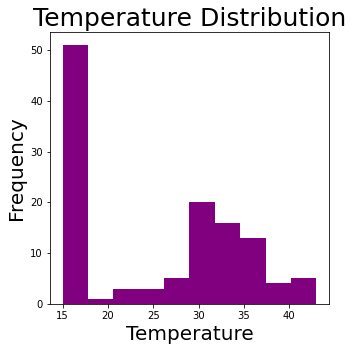

In [ ]:
plt.figure(figsize = (5, 5))

df["Temp"].plot(kind = 'hist', color = "purple")

plt.title("Temperature Distribution", fontsize = 25)
plt.xlabel("Temperature", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.savefig("temp.png")

The temperatures between 15 degrees and 20 degrees are the most common

### Plotting various vegetable conditions 

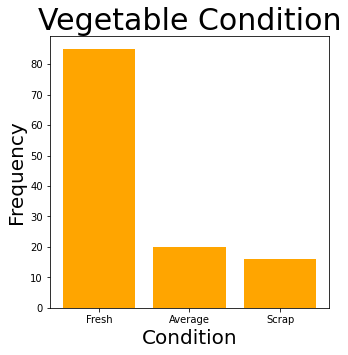

In [ ]:
f = 0
s = 0
a = 0
for i in df["Vegetable condition"]:
    if i == "fresh":
        f += 1
    elif i == "average":
        a += 1
    elif i == "scrap":
        s += 1
        
plt.figure(figsize = (5, 5))

condition = ("Fresh", "Average", "Scrap")
y_pos = np.arange(len(condition))
frequency = [f, a, s]

plt.title("Vegetable Condition", fontsize = 30)
plt.xlabel("Condition", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)

plt.bar(y_pos, frequency, align = 'center', color = "Orange")
plt.xticks(y_pos, condition)
plt.savefig("Condition.png")
plt.show()

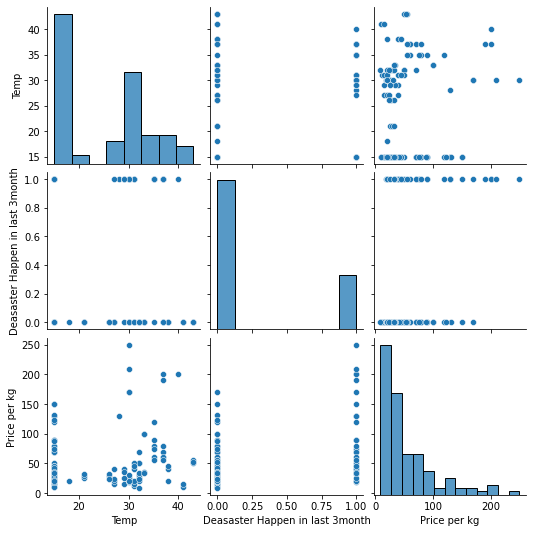

In [ ]:
sns.pairplot(df)
plt.savefig("Pairplot.png")

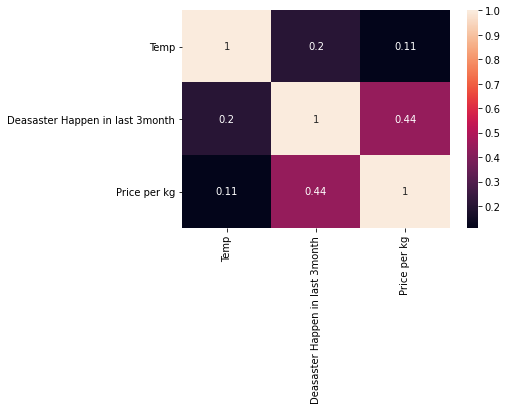

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.savefig("Heatmap.png")

# Prediction Model

In [ ]:
x = df.drop(columns = "Price per kg")

In [ ]:
y = df["Price per kg"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
ohe = OneHotEncoder()

In [ ]:
ohe.fit(x[["Vegetable", "Season", "Month", "Deasaster Happen in last 3month", "Vegetable condition"]])

OneHotEncoder()

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_), ["Vegetable", "Season", "Month", "Deasaster Happen in last 3month", "Vegetable condition"]), 
                                       remainder = "passthrough")

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans, lr)

In [ ]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['bitter gourd', 'brinjal', 'cabbage', 'cauliflower', 'chilly',
       'cucumber', 'garlic', 'ginger', 'okra', 'onion', 'peas',
       'pointed gourd', 'potato', 'pumpkin', 'raddish', 'tomato'],
      dtype=object),
                                                                            array(['autumn', 'monsoon', 'spring', 'summer', 'winter'], dtype=object),
                                                                            array([' ', 'apr', 'aug', 'dec', 'jan', 'july', 'june', 'march', 'may',
       'oct', 'sept'], dtype=object),
                                                                            array([0, 1]),
                                                                            array(['average', 'fresh', 'scrap'

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
y_pred

array([ 54.99999865,  71.69174623,  28.45863582,   0.86070283,
        13.49999804, 127.50000097,  19.193703  ,   5.16434787,
       110.98682643,  -3.50364425, 141.78748996,  35.8227311 ,
        36.44188251,  80.00000087, 110.98682643, -17.73060969,
        52.26408249,  49.27099165,  39.36156476,  19.193703  ,
        80.00000087, -17.73060969, -17.73060969,   8.13046268,
         8.13046268, 127.50000097, 129.67881457,  80.00000087,
        54.99999865, 141.78748996, 128.44537481, 161.15776006,
        80.33835457,  33.42041545,  38.83672968,  49.87814649,
        11.70629411])

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
def predict():
    w = Tk()
    w.title("Vegetable Price Predictor")
    w.geometry("500x500")
    w.resizable(0, 0)
    
    bg = PhotoImage( file = "C:/Users/RAJESH KUMAR/Downloads/greenbg.png")
    
    f = tk.Frame(w, height = 1000, width = 1000)
    f.place(x = 0, y = 0)

    l2 = tk.Label(f, height = 600, width = 800, image = bg)
    l2.place(x = 0, y = 0)
    
    l = tk.Label(w, text = "Vegetable Price Predictor", bg = "yellow", fg = "black", font = "cambria 25 bold")
    l.place(x = 55, y = 0) 
    
    n = tk.StringVar()
    t = ttk.Combobox(w, width = 23, textvariable = n, height = 10, state = "readonly")
    t["values"] = ['potato', 'tomato', 'peas', 'pumpkin', 'cucumber', 'pointed gourd', 'raddish', 'bitter gourd', 
                   'onion', 'garlic', 'cabbage', 'cauliflower', 'chilly', 'okra', 'brinjal', 'ginger']
    t.place(x = 200,y = 80)
    
    l = tk.Label(w, text = "Vegetable Name", bg = "yellow", fg = "black", font = "cambria 15 bold")
    l.place(x = 30, y = 80)
    
    t1= tk.Entry(w, width = 5, font = "oswald 15", highlightcolor = "purple",
        relief = "sunken", highlightthickness = 0.5)
    t1.place(x = 200, y = 130)
    
    l = tk.Label(w, text = "Temperature", bg = "yellow", fg = "black", font = "cambria 15 bold")
    l.place(x = 30,y = 130)
    
    l = tk.Label(w, text = "Disaster in the last 3 months (0/1)", bg = "yellow", fg = "black", font = "cambria 15 bold")
    l.place(x = 30, y = 180)
    
    t2= tk.Entry(w, width = 5, font = "oswald 15", highlightcolor = "purple",relief = "sunken", highlightthickness = 0.5)
    t2.place(x = 390, y = 180)
    
    l = tk.Label(w, text = "Season", bg = "yellow", fg = "black", font = "cambria 15 bold")
    l.place(x = 30, y = 230)
    
    t3= tk.Entry(w, width = 23, font = "oswald 15", highlightcolor = "purple",relief = "sunken", highlightthickness = 0.5)
    t3.place(x = 200, y = 230)
    
    l = tk.Label(w, text = "Month", bg = "yellow", fg = "black", font = "cambria 15 bold")
    l.place(x = 30, y = 280)
    
    n1 = tk.StringVar()
    t4 = ttk.Combobox(w, width = 23, textvariable = n1, height = 10, state = "readonly")
    t4["values"] = ['jan', 'march', 'apr', 'may',  'june', 'july', 'aug', 'sept', 'oct', 'dec']
    t4.place(x = 200,y = 280)
    
    def click():
        ans = pipe.predict(pd.DataFrame([[t.get(), t3.get(), t4.get(), int(t1.get()), int(t2.get()), "fresh"]],
                                  columns = ["Vegetable", "Season", "Month", "Temp", "Deasaster Happen in last 3month"
                                            , "Vegetable condition"]))
        l = tk.Label(w, text = ans, bg = "red", fg = "black", font = "cambria 15 bold")
        l.place(x = 300, y = 350)
    
    b = tk.Button(w, text = "Predict", font = "cambria 13 bold",fg = "white",
         width = 20,bg = "black", relief = "flat", activebackground = "white",activeforeground = "#340878", command = click)
    b.place(x = 140,y = 450)
    
    l = tk.Label(w, text = "Predicted Price (in Rs.)", bg = "yellow", fg = "black", font = "cambria 15 bold")
    l.place(x = 30, y = 350)
    
    mainloop()

In [ ]:
predict()